In [1]:
#we are extracting and loading the data here in this step
port pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


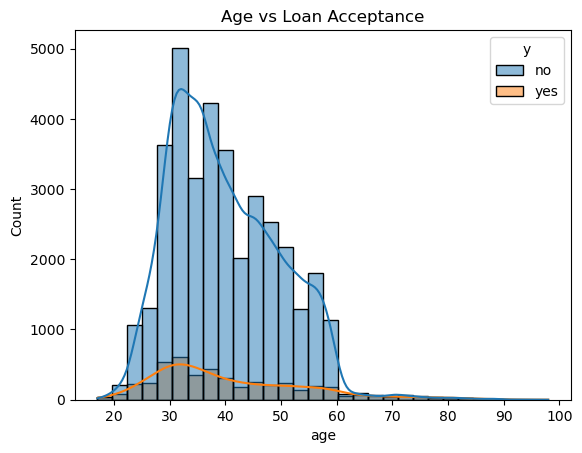

In [2]:
#Let’s start by looking at how age, job, and marital status relate to whether someone accepted the loan (y)

import seaborn as sns
import matplotlib.pyplot as plt
# Age Distribution vs Loan Acceptance
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True)
plt.title("Age vs Loan Acceptance")
plt.show()


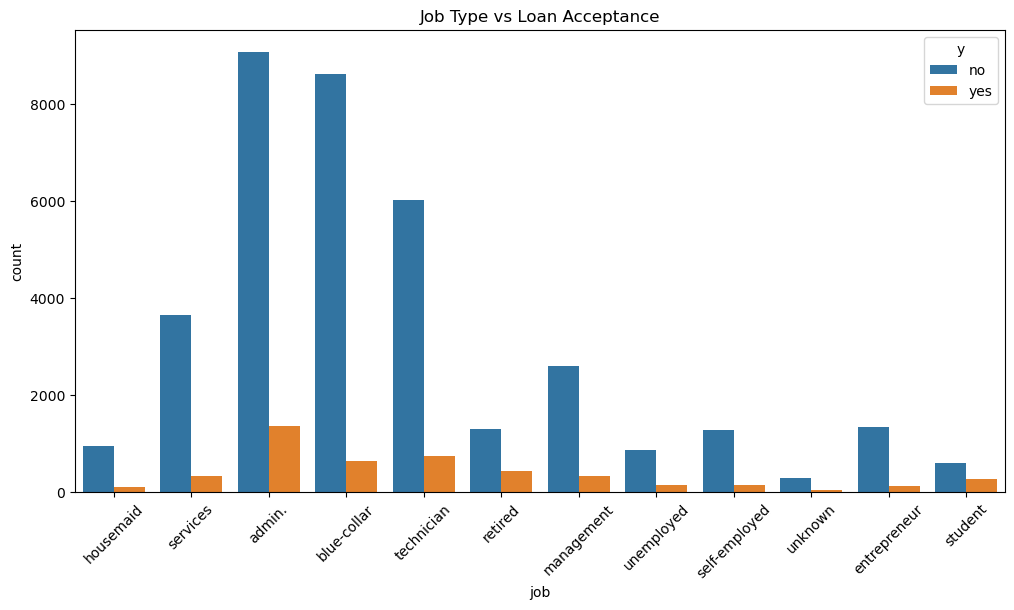

In [3]:
# Job Type vs Loan Acceptance

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job Type vs Loan Acceptance")
plt.show()


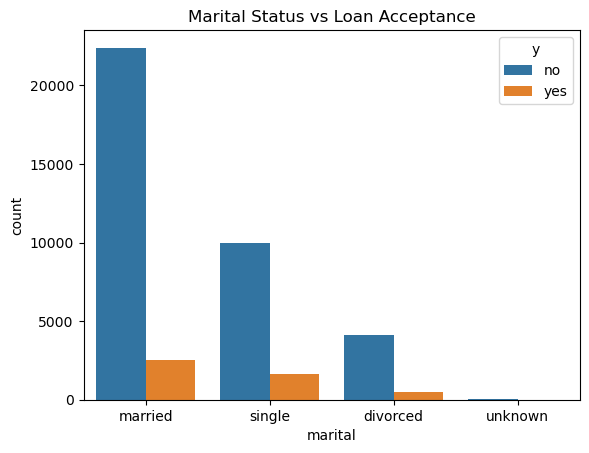

In [4]:
# Marital Status vs Loan Acceptance

sns.countplot(data=df, x='marital', hue='y')
plt.title("Marital Status vs Loan Acceptance")
plt.show()


In [5]:
# Since the dataset contains text columns (like job, marital, education, etc.), we’ll convert them into numbers using One-Hot Encoding.

# Convert all categorical variables into numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the new structure
df_encoded.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [6]:
# now we will Train a Classification Model (Logistic Regression)
#Prepare Features and Target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Target column is y_yes (after one-hot encoding)
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [10]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(   X, y, test_size=0.2, random_state=42)
  


In [14]:
# Train the Logistic Regression Model

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)


D:\Anaconda_Jup_Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [16]:
# Predict on the Test Set

y_pred = model.predict(X_test)

In [17]:
# Let’s check how well our model performed and see what we can learn from it.

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9112648701141054
Confusion Matrix:
 [[7104  199]
 [ 532  403]]


In [20]:
#  Evaluating the Model now
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

